In [25]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
mpg = pd.read_csv('/content/gdrive/My Drive/mpg.csv')

In [27]:
mpg
# 차종이 compact, suv인 것의 도시연비는 차이가 있는가?

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [28]:
mpg1 = mpg.groupby('category',as_index=False).agg(meancty=('cty','mean'))
mpg1

,category,meancty
0,2seater,15.400000
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
4,pickup,13.000000
5,subcompact,20.371429
6,suv,13.500000


In [29]:
mpg1 = mpg1[mpg1['category'].isin(['suv','compact'])] #파이썬에 in 있네..
mpg1

,category,meancty
1,compact,20.12766
6,suv,13.50000


In [30]:
# 두 집단이 차이 난다고 말할 수 있는가?
# 통계에는 기술통게와 추론통계까 있는디
# 기술통계: 누가 봐도 마땅한 값이 정해진 것. 평균, 최대, 최소, 개수, 표준편차 등
# 추론통계는 특정 가설이 통계적으로 의미가 있는지 등 파악하는 거 (~할 것이다)

In [33]:
# 유의확률(우연히발생할확률) 값을 구하고 그 값이 통상적으로 0.05이하면 신뢰할 수 있다고 본다
# 유의확률 값 구하기 위해
# 두 집단 category가 compact인 것의 cty와 suv인 것의 cty를 각각 ㅊ출한다
compact = mpg.query('category=="compact"')['cty']
suv = mpg.query('category=="suv"')['cty']

In [34]:
# 유의확률 값을 확인하기 위해 t검정을 함
from scipy import stats

In [35]:
stats.ttest_ind(compact,suv,equal_var=True) #이게 T검정을 하는 함수임
#결과의 pvalue 가 유의확률값임 pvalue=2.3909550904711282e-21,==> 2.3909550904711282×10 −21승으로 매우작다는뜻
# ==> 신뢰할 수 있다

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

In [ ]:
# 연료fl별 값의 빈도
mpg['fl'].value_counts()


In [ ]:
# 일반휘발유r와 고급휘발유p의 도시연비의 차이가 있을까?

In [38]:
mpg.query('fl in ["r","p"]').groupby("fl",as_index=False).agg(mean_cty=('cty','mean'))

,fl,mean_cty
0,p,17.365385
1,r,16.738095


In [40]:
r = mpg.query('fl=="r"')['cty']
p = mpg.query('fl=="p"')['cty']
stats.ttest_ind(r,p,equal_var=True)
# 유의확률 pvalue=0.28752051088667036 가 0.05보다 커서 위 기술통계에서 나타나는 차이는 신뢰할 수 없다.
# 두 집단의 유의미한 차이는 없다고 볼 수 잇음.

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

In [41]:
#각 집단의 차이를 신뢰할 수 있나 파악하기 위해서는 유의확률 값을 구한다
# 두 변수가 상관이 있는지 파악하기 위해서는 상관계수를 구한다
# corr() 함수를 이용해 상관계수를 구한다


In [42]:
economics = pd.read_csv('/content/gdrive/My Drive/economics.csv')

In [43]:
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [44]:
#실업자수(unemploy)와 개인소비지출 pce의 상관관께ㅡㄹ 알아보자
economics[['unemploy','pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [49]:
# 이 상관계수를 신뢰할만한지 pvalue를 같이 알려주는 함수도 잇삼
stats.pearsonr(economics['unemploy'],economics['pce'])
# PearsonRResult(statistic=0.614517614193208이게 상관계수, pvalue=6.773527303289964e-61)이게 피밸류
#  실업자수와 개인소비지출은 0.6정도 상관 있삼.

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

In [ ]:
#서로서로 어떤 애가 제일 영향을 마니 주는지 알고 싶다.
mtcars = pd.read_csv('/content/gdrive/My Drive/mtcars.csv')
mtcars

In [54]:
car_cor = mtcars.corr().round(2)

In [55]:
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


<Axes: >

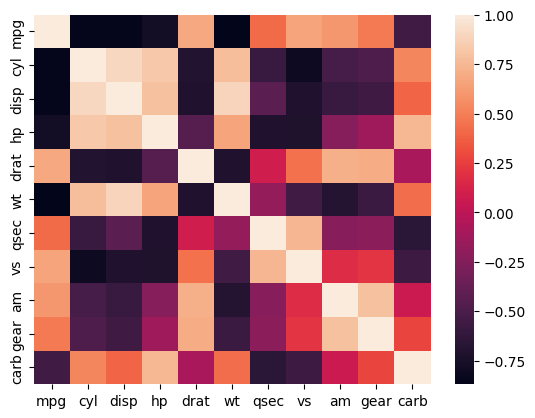

In [56]:
#히트맵을 이용해서 시각적으로 한눈에 들어오게 하자
sns.heatmap(data=car_cor)

<Axes: >

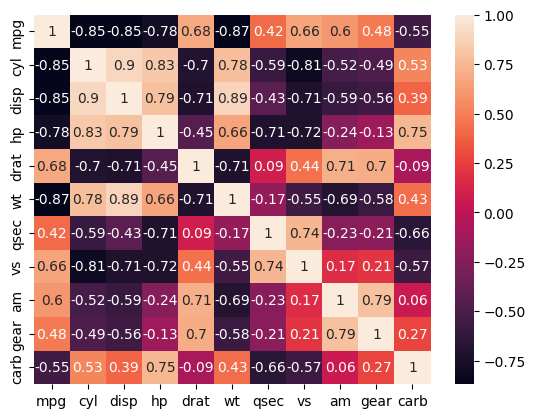

In [57]:
# 히트맵게 값도 같이 출력하게 하고 싶음
sns.heatmap(car_cor, annot=True)

In [58]:
# 대각선 기준으로 대칭이니까 한쪽을 없애자
# 상관행렬 표 구조와 동일한 0으로 채워진 2차원 배열 매트릭스를 만들거야
mask = np.zeros_like(car_cor) #car_cor랑 같은 모양으로 0으로 채워줘
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
# 대각선 위쪽의 마스크 배열을 1로 채우는 법
mask[np.triu_indices_from(mask)]=1

In [60]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

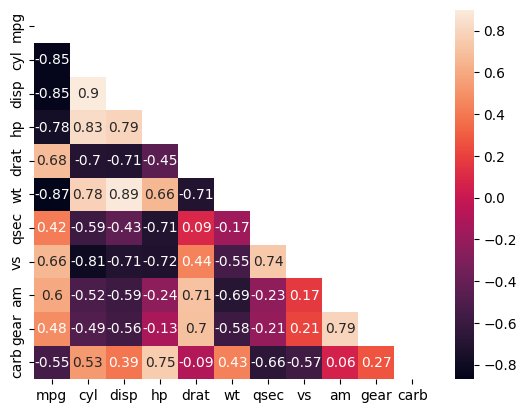

In [61]:
# mask를 매개변수로 해서 다시 히트맵 그려준다..
sns.heatmap(
    data=car_cor,
    annot =True,
    mask= mask
)